In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

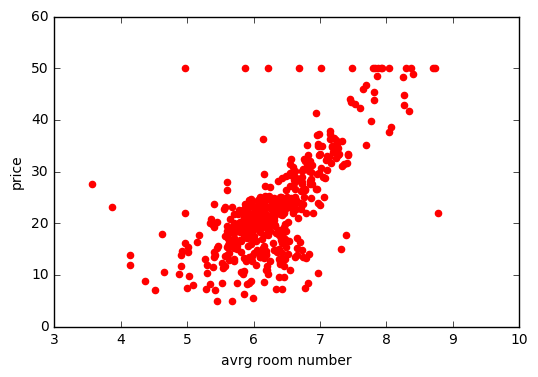

In [2]:
plt.scatter(boston.data[:, 5], boston.target, color='r') #5 ili 6 stolbec daty
plt.xlabel('avrg room number')
plt.ylabel('price')

In [3]:
from sklearn.linear_model  import LinearRegression

lr = LinearRegression()
lr.fit(boston.data[:,5].reshape(-1, 1), boston.target)

grid = np.linspace(boston.data[:,5].min(), boston.data[:,5].max(), 100)
best_line = lr.predict(grid.reshape(-1, 1))

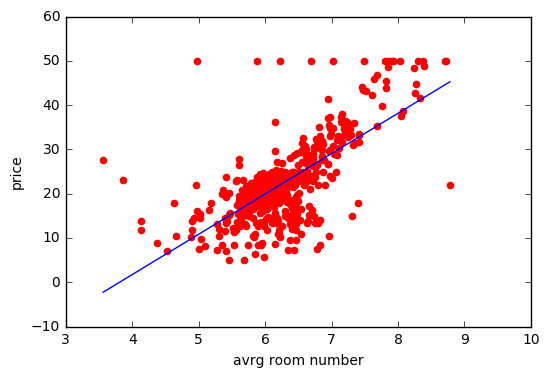

In [4]:
plt.scatter(boston.data[:, 5], boston.target, color='r') #5 ili 6 stolbec daty
plt.plot(grid, best_line)
plt.xlabel('avrg room number')
plt.ylabel('price')

In [5]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(boston.data[:, 5].reshape(-1, 1))
MSE = mean_squared_error(boston.target, y_pred)
print('MSE =', MSE)
# neponyatno chto eto za znachenie oshibki, o chem ono govorit i v kakix edinicax
# zdes otvety proveriayutsa no obuchayushey vyborke, eto nepravilno

MSE = 43.6005517712


In [ ]:
# na slayde 11 spravo vverxu nexvataet 1/l
# eta metrika schitaet nasckolko algoritm priblizhaet luchshe ili huzhe konstanty
from sklearn.metrics import r2_score
r2 = r2_score(boston.target, y_pred)

In [10]:
# normirovanie -- privedenie priznakov k primerno odnomu masshtabu
# normirovanie
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(boston.data)
X = scaler.transform(boston.data)

print('new mean=', np.mean(X, axis=0))
print('new std=', np.std(X, axis=0))
# std -- srednekvadratichnoe otklonenie -- SKO -- koren iz dispersii

new mean= [  6.34099712e-17  -6.34319123e-16  -2.68291099e-15   4.70199198e-16
   2.49032240e-15  -1.14523016e-14  -1.40785495e-15   9.21090169e-16
   5.44140929e-16  -8.86861950e-16  -9.20563581e-15   8.16310129e-15
  -3.37016317e-16]
new std= [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


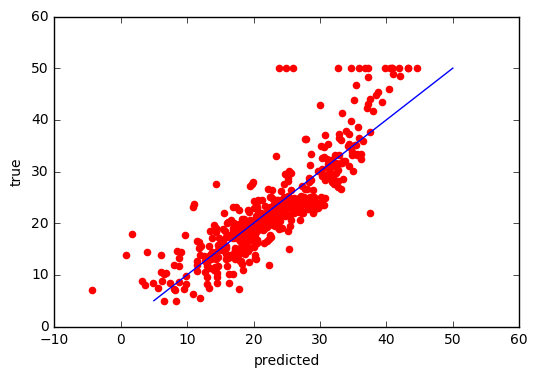

In [11]:
y = boston.target #otvety obuch vyborki
lr.fit(X, y)

y_pred = lr.predict(X)
plt.scatter(y_pred, y, color='r')
plt.xlabel('predicted')
plt.ylabel('true')
plt.plot([y.min(), y.max()], [[y.min()], [y.max()]])
# po osi X -- y_pred
# po Y -- y_true
# priamaya s uglom 45 gradusov. chtob ee postroit -- vziat odinakovue koordinaty po X i Y
# naprimer, dlia istinnogo otveta 12 my predskazali 0 

In [ ]:
# pri normirovanoy vyborke -- chem bolshe vesovoy koeficient, tem vazhnee priznak
# chem bolshe w, tem vazhnee priznak

In [ ]:
from sklearn.cross_validation import KFold
kf = KFold(X.shape[0], n_folds=5) #na vxod kolichestvo objectov vyborki
y_pred = np.zeros(y.shape)
for train, test in kf: #zdes KFold iteraciy
# cikl generiruet indexy podannoy na vxod vyborki
# slayd 18
